### Multiple Inputs - Hidden Layers

This notebook is designed to work with multiple input layers and hidden layers.

It is intended for educational purposes to demonstrate the basic structure of a neural network.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    for i in range(len(x)):
        x[i] = sigmoid(x[i]) * (1 - sigmoid(x[i]))
    return x

In [3]:
def row(list):
    return np.array(list).reshape(1, -1)

def column(list):
    return np.array(list).reshape(-1, 1)

In [4]:
def z(prev_a, w, b):
    return prev_a @ w + b

def c(a, y):
    return sum(((a - y) ** 2)[0])

def dc_da(a, y):
    return 2 * (a - y)

In [5]:
def forward(x, w_list, b_list, y):
    z_list = [0 for _ in range(len(w_list))]
    a_list = [x] + [0 for _ in range(len(w_list))]
    for i in range(len(w_list)):
        z_list[i] = z(a_list[i], w_list[i], b_list[i])
        a_list[i + 1] = sigmoid(z_list[i])
    c_value = c(a_list[-1], y)
    return z_list, a_list, c_value

def backward(x, w_list, b_list, y, learning_rate=0.1):
    z_list, a_list, c_value = forward(x, w_list, b_list, y)
    dc_dw = [0 for _ in range(len(w_list))]
    dc_db = [0 for _ in range(len(b_list))]
    delta = 1
    dz_da_list = w_list[1:] +  [dc_da(a_list[-1], y)]
    da_dz_list = sigmoid_derivative(z_list)
    dz_dw_list = a_list[:-1]

    for i in range(len(w_list) - 1, -1, -1):
        if i == len(w_list) - 1:
            delta = dz_da_list[i] * da_dz_list[i]
        else:
            delta = (delta @ dz_da_list[i].T) * da_dz_list[i]
        dc_dw[i] = dz_dw_list[i].T @ delta
        dc_db[i] = np.sum(delta, axis=0, keepdims=True).reshape(1, -1)

    for i in range(len(w_list)):
        w_list[i] -= learning_rate * dc_dw[i]
        b_list[i] -= learning_rate * dc_db[i]

    c_value = forward(x, w_list, b_list, y)[2]
    return w_list, b_list, c_value

In [6]:
def hidden(x, w_list, b_list, y, alpha, iters=100, graph=False):
    c_list = []
    c_value = forward(x, w_list, b_list, y)[2]
    c_list.append(c_value)

    for _ in range(iters):
        w_list, b_list, c_value = backward(x, w_list, b_list, y, learning_rate=alpha)
        c_list.append(c_value)

    if graph:
        plt.plot(c_list)
        plt.grid()
        plt.title('Cost Function')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.yscale('log')

    _, a_value, c_value = forward(x, w_list, b_list, y)
    print('x: ', x)
    print('y: ', y)
    print('a: ', a_value[-1])
    print('Final Cost:', c_value)

x:  [[5 6]]
y:  [[0.8 0.2 0.1]]
a:  [[0.8 0.2 0.1]]
Final Cost: 3.0814879110195774e-32


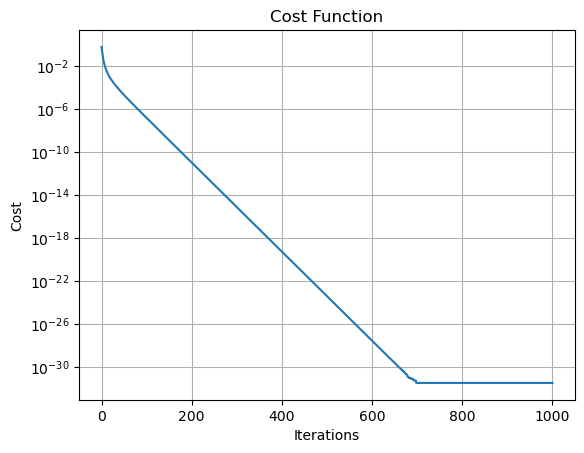

In [7]:
x = row([5, 6])
w_list = [np.array([[0.2, 0.1], [0.3, 0.4]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5]]), np.array([[0.2, 0.1, 0.4], [0.3, 0.4, 0.5], [0.1, 0.2, -0.1]])]
b_list = [row([0.4, 0.8]), row([0.5, 0.6, 0.7]), row([0.1, 0.25, 0.1])]
y = row([0.8, 0.2, 0.1])
alpha = 1

hidden(x, w_list, b_list, y, alpha, iters=1000, graph=True)

In [8]:
def makeInputs(sizes, batch_size=1):
    x = np.random.rand(batch_size, sizes[0])
    w_list = []
    b_list = []
    for i in range(len(sizes) - 1):
        w_list.append(np.random.rand(sizes[i], sizes[i + 1]))
        b_list.append(np.random.rand(1, sizes[i + 1]))
    y = np.random.rand(batch_size, sizes[len(sizes) - 1])
    alpha = random.random()
    return x, w_list, b_list, y, alpha

x:  [[0.83185248 0.28104163 0.49875637 0.14691481 0.86053648]]
y:  [[0.86308747 0.51630007]]
a:  [[0.86307317 0.51630011]]
Final Cost: 2.046078700379569e-10


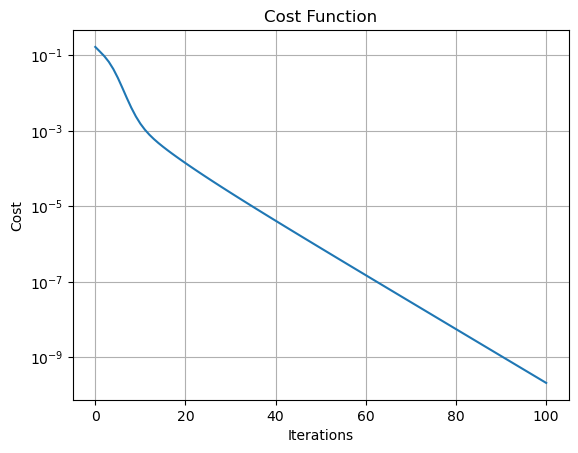

In [9]:
sizes = [5, 3, 4, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes)

hidden(x, w_list, b_list, y, 0.8, iters=100, graph=True)

x:  [[0.24494247 0.60338839]
 [0.02111073 0.51864009]
 [0.52830974 0.85528014]
 ...
 [0.74748881 0.76561463]
 [0.55803179 0.09311379]
 [0.5444246  0.93197202]]
y:  [[5.99968153e-02 3.64077550e-01]
 [4.45662778e-04 2.68987548e-01]
 [2.79111180e-01 7.31504114e-01]
 ...
 [5.58739525e-01 5.86165765e-01]
 [3.11399483e-01 8.67017865e-03]
 [2.96398145e-01 8.68571837e-01]]
a:  [[0.06846406 0.34492054]
 [0.04390539 0.25721945]
 [0.24207076 0.77108004]
 ...
 [0.61079562 0.6366922 ]
 [0.28379525 0.047642  ]
 [0.26829872 0.84770149]]
Final Cost: 0.0004386850183507096


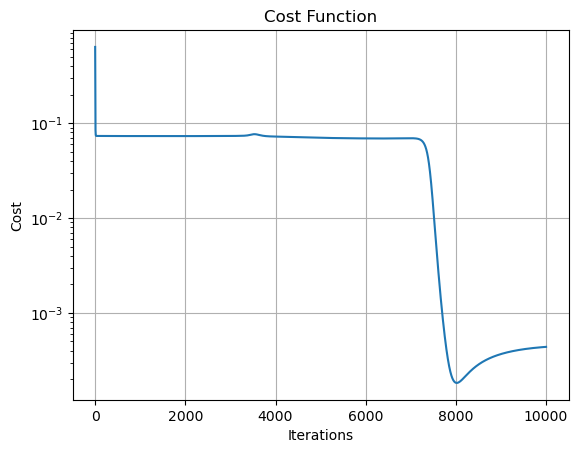

In [10]:
sizes = [2, 2, 3, 2]
x, w_list, b_list, y, alpha = makeInputs(sizes, 1000)
y = x**2

hidden(x, w_list, b_list, y, .001, iters=10000, graph=True)

In [11]:
x = np.array([[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]])
y = x **2
_, a_value, c_value = forward(x, w_list, b_list, y)
print('x: ', x)
print('y: ', y)
print('a: ', a_value[-1])
print('Final Cost:', c_value)

x:  [[0.1 0.2]
 [0.3 0.4]
 [0.5 0.6]]
y:  [[0.01 0.04]
 [0.09 0.16]
 [0.25 0.36]]
a:  [[0.06567925 0.08171071]
 [0.09010673 0.13820659]
 [0.19846617 0.33000832]]
Final Cost: 0.004839963116779505
